Looking at the dataset I would use NLTK library to approach this problem. To begin with, I would do some basic data processing, which would be:
* Converting all the text to lower case,
* Tokenization, to split sentences into separate words
* Remove punctuations,
* Removing the stop words i.e. words that don't add any meaning or value to the sentence.

With the above data pre-processing we can also think of creating features which can be used in classification. For example, we can have features such as:
1. Length of sentences for each author
2. Frequency of certain words used by each author
3. Unique words for each author

In the following steps I shall be performing the data preprocessing mentioned above along with visualizations of some of the features we could engineer for classification.
Note: No classification has been performed. 

In [1]:
import nltk
import pandas as pd

In [2]:
trainingData = pd.read_csv("./all/train/train.csv")
trainingData.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [3]:
# To see number of training samples per author
trainingData['author'].value_counts().plot(kind='bar')

In [4]:
# Separate all the sentences for each author and convert it into one long sentence for ease in processing
eap = list(trainingData[trainingData.author=="EAP"]["text"].values)
eapSentences = ' '.join(eap)

mws = list(trainingData[trainingData.author=="MWS"]["text"].values)
mwsSentences = ' '.join(mws)

hpl = list(trainingData[trainingData.author=="HPL"]["text"].values)
hplSentences = ' '.join(hpl)

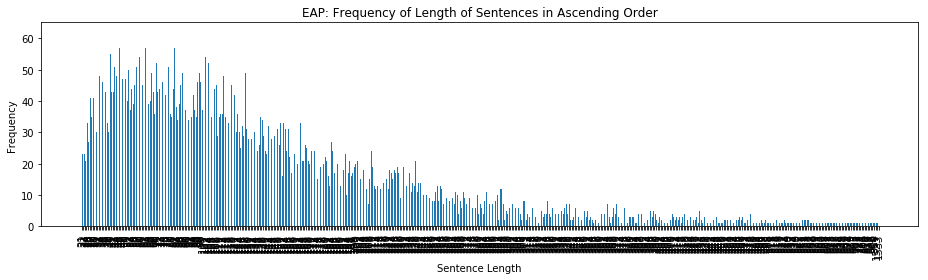

In [5]:
# To display the frequency of sentence lengths
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

### EAP ###
eapLengthOfSentences = list()
for i in range(len(eap)):
    eapLengthOfSentences.append(len(eap[i]))

eapSortSenLen = sorted(eapLengthOfSentences) # Arranging the sentence lengths in ascending order
eapSortOccurence = Counter(eapSortSenLen) # Creating value count for each sentence length

# plotting the histogram of grouped sentence lengths in ascending order
labels, values = zip(*eapSortOccurence.items())
indexes = np.arange(len(labels))
width = 0.5
plt.figure(figsize=(13,4))
plt.bar(indexes, values, width)
plt.title("EAP: Frequency of Length of Sentences in Ascending Order")
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.xticks(indexes + width, labels, rotation='vertical')
plt.tight_layout()
plt.show()

Note: I apologize for the xlabels. There were too many of them to be displayed properly.

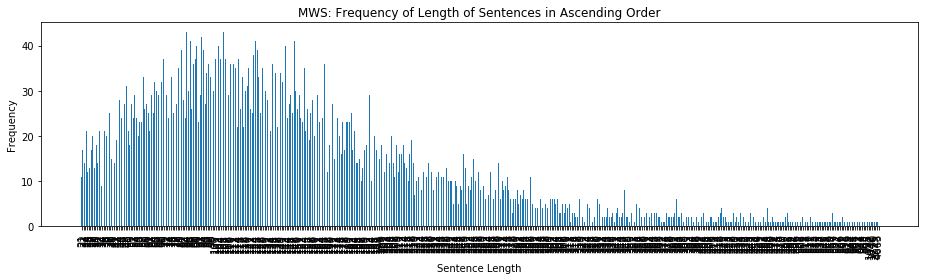

In [6]:
### MWS ###
mwsLengthOfSentences = list()
for i in range(len(mws)):
    mwsLengthOfSentences.append(len(mws[i]))

mwsSortSenLen = sorted(mwsLengthOfSentences) # Arranging the sentence lengths in ascending order
mwsSortOccurence = Counter(mwsSortSenLen) # Creating value count for each sentence length

# plotting the histogram of grouped sentence lengths in ascending order
labels, values = zip(*mwsSortOccurence.items())
indexes = np.arange(len(labels))
width = 0.5
plt.figure(figsize=(13,4))
plt.bar(indexes, values, width)
plt.title("MWS: Frequency of Length of Sentences in Ascending Order")
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.xticks(indexes + width, labels, rotation='vertical')
plt.tight_layout()
plt.show()

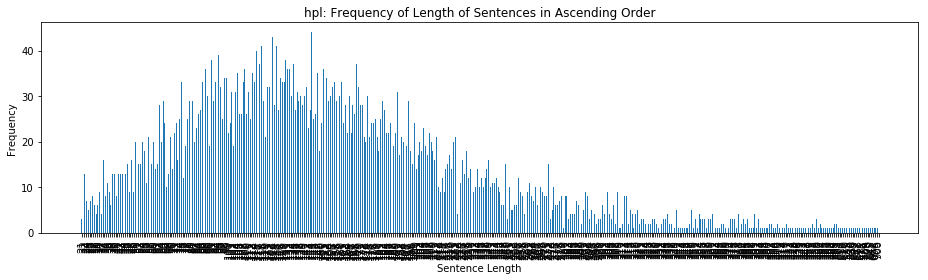

In [7]:
### HPL ###
hplLengthOfSentences = list()
for i in range(len(hpl)):
    hplLengthOfSentences.append(len(hpl[i]))

hplSortSenLen = sorted(hplLengthOfSentences) # Arranging the sentence lengths in ascending order
hplSortOccurence = Counter(hplSortSenLen) # Creating value count for each sentence length

# plotting the histogram of grouped sentence lengths in ascending order
labels, values = zip(*hplSortOccurence.items())
indexes = np.arange(len(labels))
width = 0.5
plt.figure(figsize=(13,4))
plt.bar(indexes, values, width)
plt.title("hpl: Frequency of Length of Sentences in Ascending Order")
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.xticks(indexes + width, labels, rotation='vertical')
plt.tight_layout()
plt.show()

From the above graphs we can see that EAP has higher preference for shorter sentences, compared to MWS and HPL who have more medium length sentences. 

#### Converting sentences to lower case

In [8]:
# Convert all the text to lower case to have no difference between cases like 'The' and 'the'
eapSentences = eapSentences.lower()
mwsSentences = mwsSentences.lower()
hplSentences = hplSentences.lower()

#### Tokenizing sentences

In [9]:
# Tokenize the sentences
eapTokenized = nltk.word_tokenize(eapSentences)
mwsTokenized = nltk.word_tokenize(mwsSentences)
hplTokenized = nltk.word_tokenize(hplSentences)

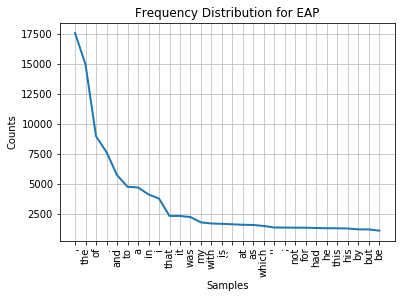

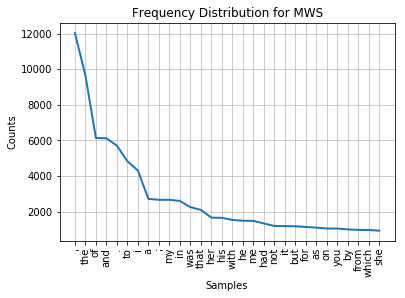

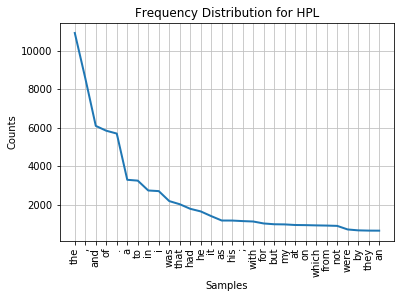

In [10]:
# Plot the frequency distribution of top-30 tokens for each author
eapFrequencyDistribution = nltk.FreqDist(eapTokenized)
eapFrequencyDistribution.plot(30,cumulative=False, title="Frequency Distribution for EAP") 

mwsFrequencyDistribution = nltk.FreqDist(mwsTokenized)
mwsFrequencyDistribution.plot(30,cumulative=False, title="Frequency Distribution for MWS") 

hplFrequencyDistribution = nltk.FreqDist(hplTokenized)
hplFrequencyDistribution.plot(30,cumulative=False, title="Frequency Distribution for HPL") 

As seen in the above plots we have many punctuations which will not help us during the classification.

#### Removing punctuations

In [11]:
# To remove the punctuations we make use of another tokenizer provided with NLTK module
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

eapTokenizedPunc = tokenizer.tokenize(eapSentences)
mwsTokenizedPunc = tokenizer.tokenize(mwsSentences)
hplTokenizedPunc = tokenizer.tokenize(hplSentences)

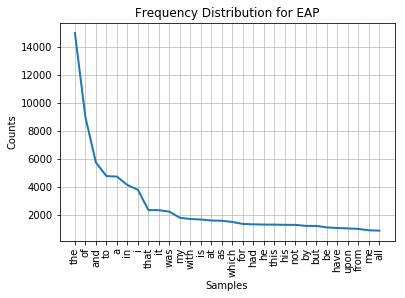

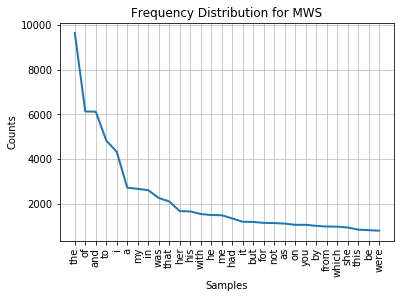

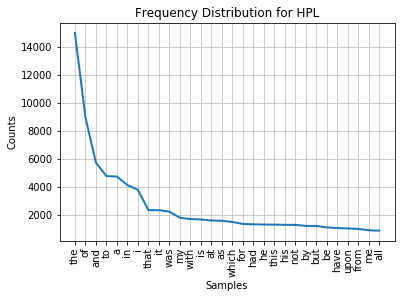

In [12]:
# Plotting the frequency Distribution without punctuations
eapFrequencyDistributionPunc = nltk.FreqDist(eapTokenizedPunc)
eapFrequencyDistributionPunc.plot(30,cumulative=False, title="Frequency Distribution for EAP") 

mwsFrequencyDistributionPunc = nltk.FreqDist(mwsTokenizedPunc)
mwsFrequencyDistributionPunc.plot(30,cumulative=False, title="Frequency Distribution for MWS") 

hplFrequencyDistributionPunc = nltk.FreqDist(eapTokenizedPunc)
hplFrequencyDistributionPunc.plot(30,cumulative=False, title="Frequency Distribution for HPL") 

Even after removal of punctuations, we notice many stopwords i.e. words that don't add any meaning or value to the sentence. 

#### Removing stop words

In [13]:
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
print("Stop words in English: ", stopWords)

eapFilteredSentences = [w for w in eapTokenizedPunc if not w in stopWords]
mwsFilteredSentences = [w for w in mwsTokenizedPunc if not w in stopWords]
hplFilteredSentences = [w for w in hplTokenizedPunc if not w in stopWords]

Stop words in English:  {'themselves', "she's", 'can', "wasn't", 'until', 'while', 'off', "don't", 'weren', 'here', 'hasn', 'hers', 'she', "that'll", 'in', 'on', 'over', 'some', "couldn't", 'where', 'each', 'were', 'no', 'at', 'and', 'now', "you've", 'as', 'above', 'out', 'hadn', "haven't", 'these', 'between', 'he', "hasn't", 'doing', 'who', 'having', 'a', 'about', 'd', 'other', 'yours', 'was', 'again', 'too', 'couldn', 'them', 'does', "hadn't", 'did', 'am', 'whom', 'be', 'wouldn', 'has', 'into', 'the', 'myself', "won't", 'doesn', 'mightn', 'before', "aren't", "you'll", 've', 'itself', 'y', "doesn't", 'few', 'more', 'have', "isn't", 'herself', 'yourselves', 'all', 'own', 'with', 'me', 'been', 'by', 'once', 'didn', 'needn', 't', 'how', 'that', 'during', 'yourself', 'from', "didn't", "wouldn't", "you'd", 'after', 'shan', 'below', 'will', 'mustn', 'there', 'up', 'ma', 'won', 'we', 'do', 's', 'shouldn', 'those', 'his', 'its', 'which', 'theirs', 'their', 'my', 'should', 'an', 'why', 'than',

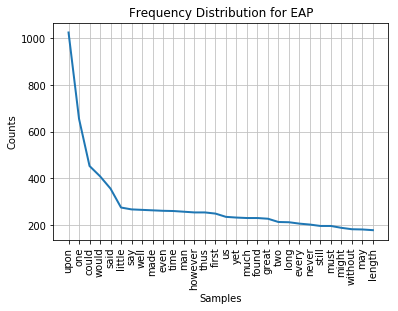

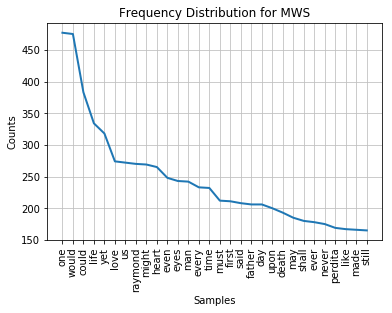

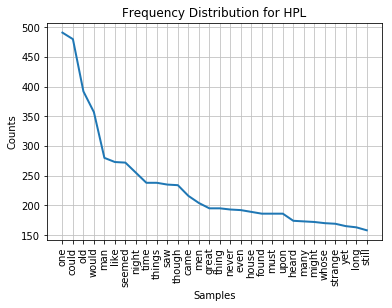

In [14]:
# Plot frequency distribution without stopwords
eapFrequencyDistributionFiltered = nltk.FreqDist(eapFilteredSentences)
eapFrequencyDistributionFiltered.plot(30,cumulative=False, title="Frequency Distribution for EAP") 

mwsFrequencyDistributionFiltered = nltk.FreqDist(mwsFilteredSentences)
mwsFrequencyDistributionFiltered.plot(30,cumulative=False, title="Frequency Distribution for MWS") 

hplFrequencyDistributionFiltered = nltk.FreqDist(hplFilteredSentences)
hplFrequencyDistributionFiltered.plot(30,cumulative=False, title="Frequency Distribution for HPL") 

#### Unique words for each author

In [15]:
# We can also create another feature with the unique words for each author
eapUniqueWords = eapFrequencyDistributionFiltered.hapaxes()
print("First 10 unique words for EAP: ", eapUniqueWords[:10])

mwsUniqueWords = mwsFrequencyDistributionFiltered.hapaxes()
print("First 10 unique words for MWS: ", mwsUniqueWords[:10])

hplUniqueWords = hplFrequencyDistributionFiltered.hapaxes()
print("First 10 unique words for HPL: ", hplUniqueWords[:10])

First 10 unique words for EAP:  ['capered', 'luminosity', 'ribands', 'atomies', 'nebular', 'cosmogony', 'nebula', 'barricaded', 'cared', 'chronic']
First 10 unique words for MWS:  ['wealthier', 'fosterage', 'groundwork', 'kindliness', 'code', 'mountainous', 'sprightliness', 'scant', 'potentates', 'sledges']
First 10 unique words for HPL:  ['steals', 'wheaton', 'chinlessness', 'precociously', 'united', 'adulthood', 'symphonic', 'compasses', 'gauges', 'henceforth']


## Feature Engineering

In [23]:
import numpy as np
import string

In [24]:
trainingDataFeatEngg = pd.read_csv("./all/train/train.csv")
testingDataFeatEngg = pd.read_csv("./all/test/test.csv")

We will try to create the following features from the given dataset:
* Number of words in the text
* Number of unique words in the text
* Number of character in the text
* Number of stopwords in the text
* Number of punctuations in the text

In [25]:
# Create a set of unique words of all authors
uniqueWords = set(eapUniqueWords + mwsUniqueWords + hplUniqueWords)

In [26]:
# Number of words in the text
trainingDataFeatEngg["numWords"] = trainingDataFeatEngg["text"].apply(lambda x: len(str(x).split()))
testingDataFeatEngg["numWords"] = testingDataFeatEngg["text"].apply(lambda x: len(str(x).split()))

# Number of unique words in the text 
trainingDataFeatEngg["numUniqueWords"] = trainingDataFeatEngg["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in uniqueWords]))
testingDataFeatEngg["numUniqueWords"] = testingDataFeatEngg["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in uniqueWords]))

# Number of characters in the text 
trainingDataFeatEngg["numChars"] = trainingDataFeatEngg["text"].apply(lambda x: len(str(x)))
testingDataFeatEngg["numchars"] = testingDataFeatEngg["text"].apply(lambda x: len(str(x)))

# Number of stopwords in the text 
trainingDataFeatEngg["numStopwords"] = trainingDataFeatEngg["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in stopWords]))
testingDataFeatEngg["numStopwords"] = testingDataFeatEngg["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in stopWords]))

# umber of punctuations in the text 
trainingDataFeatEngg["numPunctuations"] =trainingDataFeatEngg['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
testingDataFeatEngg["numPunctuations"] =testingDataFeatEngg['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

In [27]:
# Map the author names to EAP = 1, MWS = 2, HPL = 3
trainingDataFeatEngg['author'] = trainingDataFeatEngg['author'].map( {'EAP': 1, 'MWS': 2, 'HPL': 3} ).astype(int)

In [31]:
# Create trainX, trainY, testX
trainX = trainingDataFeatEngg.drop(['id', 'text'], axis=1)
trainY = trainingDataFeatEngg['author']
testX = testingDataFeatEngg.drop(['id', 'text'], axis=1)

# Drop author from trainX
trainX = trainX.drop('author', axis=1)

## Classify using Random Forest Classifier

In [77]:
# Import RandomForest
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = None)

In [78]:
# Train the classifier
rf.fit(trainX, trainY)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [79]:
# Predict the class probabilities on test data
predictionsProba = rf.predict_proba(testX)

In [80]:
# Create dataframe from predicted class probabilities with column names as author names
predictionsProbaDf = pd.DataFrame(data=predictionsProba, columns=['EAP', 'MWS', 'HPL'])
predictionsProbaDf.head(10)

,EAP,MWS,HPL
0,0.476583,0.217833,0.305583
1,0.538000,0.419000,0.043000
2,0.193000,0.138000,0.669000
3,0.296000,0.351000,0.353000
4,0.256015,0.035302,0.708682
5,0.618000,0.265000,0.117000
6,0.288483,0.540750,0.170767
7,0.062619,0.576500,0.360881
8,0.604000,0.104000,0.292000
9,0.532818,0.173468,0.293714
